## Import Libraries

In [44]:
import pandas as pd

In [45]:

df = pd.read_csv('/content/loan_approval_dataset.csv')  # or whatever your file is called


# checking missing vakues

In [46]:
# Check missing values
print(df.isnull().sum())



loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


# Histogram

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

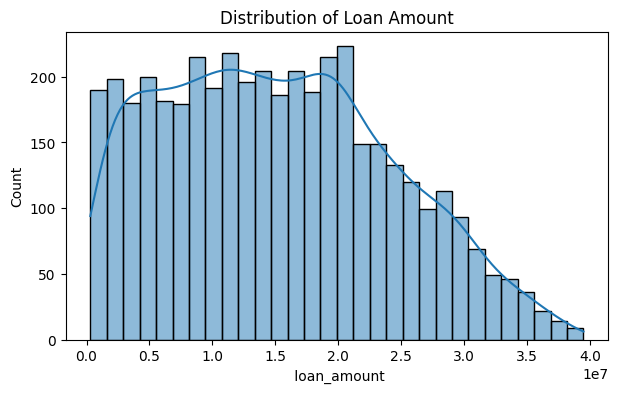

In [48]:
plt.figure(figsize=(7, 4))
sns.histplot(df[' loan_amount'], bins=30, kde=True)
plt.title("Distribution of Loan Amount")
plt.show()

# Countplot

In [49]:
import numpy as np

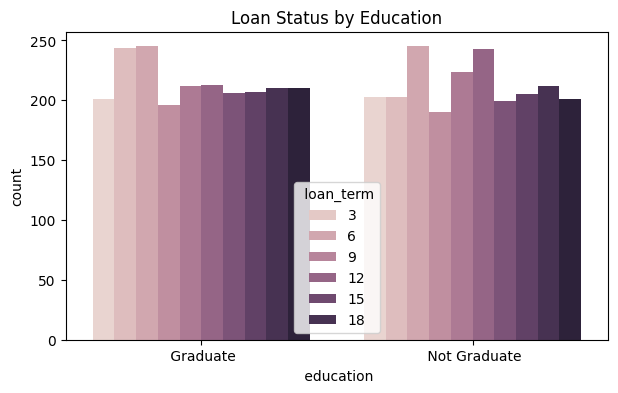

In [50]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x=' education', hue=' loan_term')
plt.title("Loan Status by Education")
plt.show()

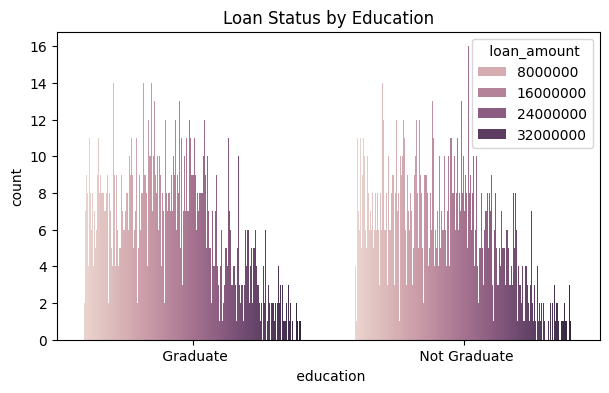

In [51]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x=' education', hue=' loan_amount')
plt.title("Loan Status by Education")
plt.show()

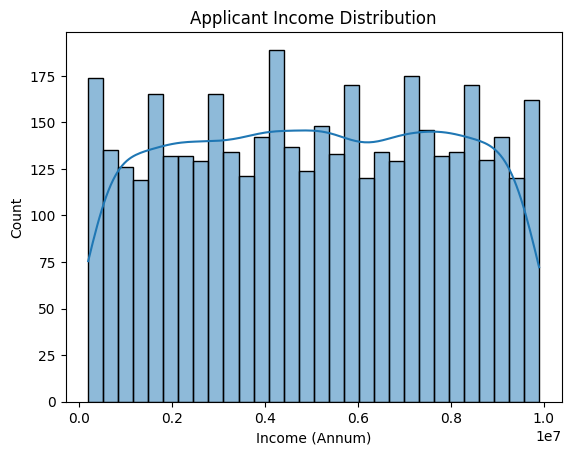

In [57]:
# If using lowercase cleaned column names
df.columns = df.columns.str.strip().str.lower()

# Now this will work
sns.histplot(df['income_annum'], kde=True, bins=30)
plt.title("Applicant Income Distribution")
plt.xlabel("Income (Annum)")
plt.show()


# prepare data for training

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [65]:
# 'loan_id' is just an identifier, not useful for training
X = df.drop(columns=['loan_amount', 'loan_status'])  # Features
y = df['loan_status']                            # Target


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Train the model by Logistic Regression


In [69]:
print(X.dtypes)



loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
dtype: object


In [70]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid modifying original data
X_encoded = X.copy()

# Encode all object-type columns
le = LabelEncoder()
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        X_encoded[col] = le.fit_transform(X_encoded[col])


In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [72]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


# evaluate

In [74]:
y_pred_lr = lr.predict(X_test)


Logistic Regression Accuracy: 0.81


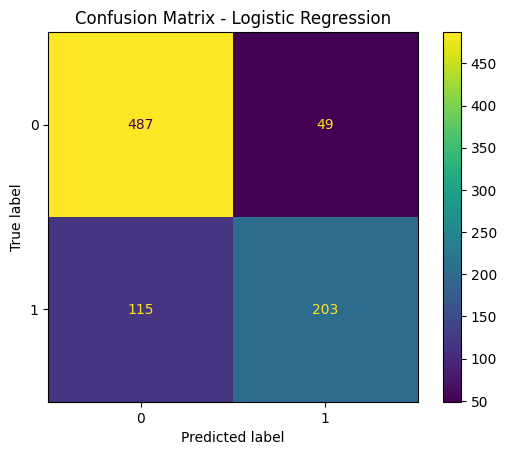

In [77]:
# Accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {acc_lr:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
